In [62]:
# Section I: Data Load and Quick Look at Columns

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

# To visually format titles between sections
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Load the data from Github Raw
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

# Quick Column Summary
column_summary = df.describe()
print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Summary Statistics:\n' + color.END + '\n', column_summary)

# Seeing Missing Data
print('\n')
missing_data = df.isnull().sum()
print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Missing Data:\n' + color.END + '\n' , missing_data)

# Visual division of code
print('\n' + '==========================================================' + '\n')

# Manually written text of findings

print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Summary Findings:' + color.END + '\n' +
'• Age: Mean age is 44.39 years with a standard deviation of 15.32.' + '\n' +
'• Monthly Payment: Mean payment is $14.58 with most payments at $14.99.' + '\n' +
'• Monthly Hours Watched: Mean of 19.07 hours with significant variability.' + '\n' +
'• Average Session Length: Mean session length is 1.89 hours with a wide range.')

Summary Statistics:

            User_ID          Age  Monthly_Payment  Monthly_Hours_Watched  \
count  1000.000000  1000.000000      1000.000000            1000.000000   
mean    500.500000    44.385000        14.580000              19.071653   
std     288.819436    15.321669         3.404922              19.279140   
min       1.000000    18.000000         9.990000               0.041574   
25%     250.750000    31.750000         9.990000               5.490739   
50%     500.500000    45.000000        14.990000              13.361219   
75%     750.250000    57.000000        14.990000              26.471636   
max    1000.000000    70.000000        19.990000             139.170408   

       Average_Session_Length   Content_ID  Rating_Given      Churned  
count             1000.000000  1000.000000   1000.000000  1000.000000  
mean                 1.893771  1049.201000      3.030000     0.246000  
std                  1.868852    29.268058      1.422365     0.430894  
min           

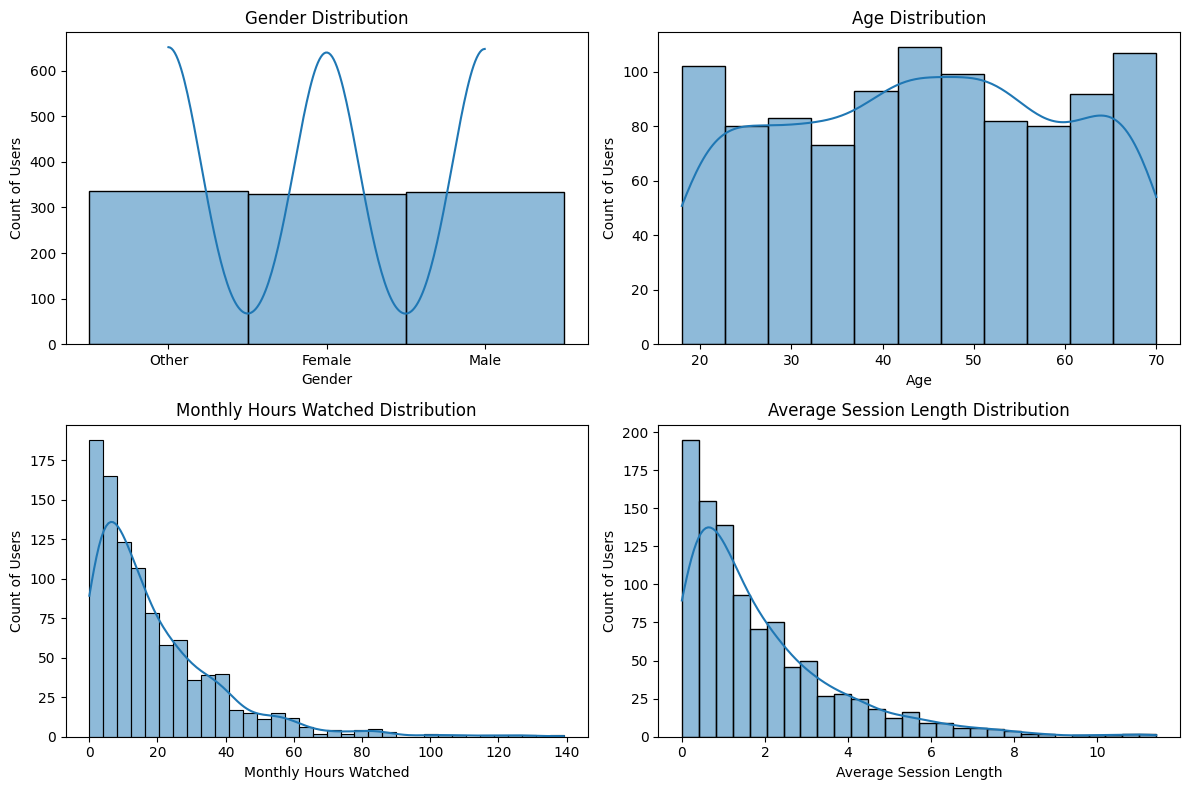

Summary Findings:
• Gender data is not that good, with almost one-third of it sitting under "Other".
• That said, we could make the assumption that gender will have no bearing on our analysis.
• Age distribution is surprisingly flat, with elder people still watching as much as younger people.
• Monthly hours watched and Average Session Length is unsurprisingly right skewed.



In [63]:
# Section II: Visualizing the Distributions of Some Columns

# Visualizing distribution of key variables
plt.figure(figsize=(12, 8))

# Plotting Gender distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Gender'], kde=True)
plt.title('Gender Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Gender')

# Plotting Age distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Age')

# Plotting Monthly hours watched distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Monthly_Hours_Watched'], kde=True)
plt.title('Monthly Hours Watched Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Monthly Hours Watched')

# Plotting Average session length distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Average_Session_Length'], kde=True)
plt.title('Average Session Length Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Average Session Length')

plt.tight_layout()
plt.show()

# Manually written text of findings

print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Summary Findings:' + color.END + '\n' +
'• Gender data is not that good, with almost one-third of it sitting under "Other".' + '\n' +
'• That said, we could make the assumption that gender will have no bearing on our analysis.' + '\n' +
'• Age distribution is surprisingly flat, with elder people still watching as much as younger people.' + '\n' +
'• Monthly hours watched and Average Session Length is unsurprisingly right skewed.' + '\n')


C:\Users\Numan\AppData\Local\Temp\ipykernel_39356\2174236008.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_subscription = df.groupby(['Age_Group', 'Subscription_Type']).size().unstack(fill_value=0)


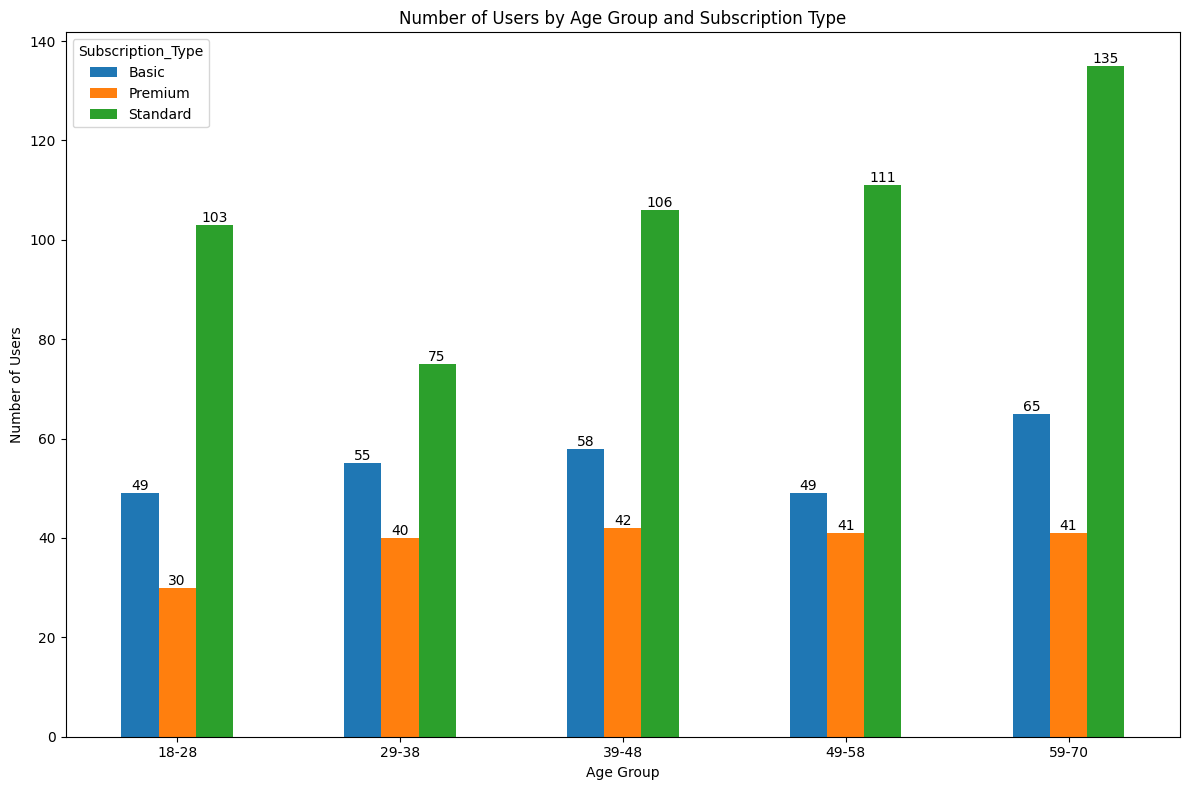

Summary Findings:
• It seems like Age has no bearing in whether or not a user is 



In [64]:
# Section III: Visualizing Payment by Age Group

# Define age bins and labels
bins = [18, 28, 38, 48, 58, 71]
labels = ['18-28', '29-38', '39-48', '49-58', '59-70']

# Add an 'Age_Group' column to the dataset
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age_Group and Subscription_Type and count the number of users
age_group_subscription = df.groupby(['Age_Group', 'Subscription_Type']).size().unstack(fill_value=0)

# Remove rows with missing values in 'Age_Group'
age_group_subscription = age_group_subscription.dropna()

# Plot the data
ax = age_group_subscription.plot(kind='bar', stacked=False, figsize=(12, 8))

# Set plot labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Users')
ax.set_title('Number of Users by Age Group and Subscription Type')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Add the 'Churn Flag' column to the dataset
df['Churn_Flag'] = df['Reason_for_Churn'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

# Manually written text of findings

print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Summary Findings:' + color.END + '\n' +
'• It seems like Age has no bearing in whether or not a user is ' + '\n')

C:\Users\Numan\AppData\Local\Temp\ipykernel_39356\541401177.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basic_churn = basic_data.groupby(['Age_Group', 'Churn_Flag']).size().unstack(fill_value=0)
C:\Users\Numan\AppData\Local\Temp\ipykernel_39356\541401177.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  standard_churn = standard_data.groupby(['Age_Group', 'Churn_Flag']).size().unstack(fill_value=0)
C:\Users\Numan\AppData\Local\Temp\ipykernel_39356\541401177.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

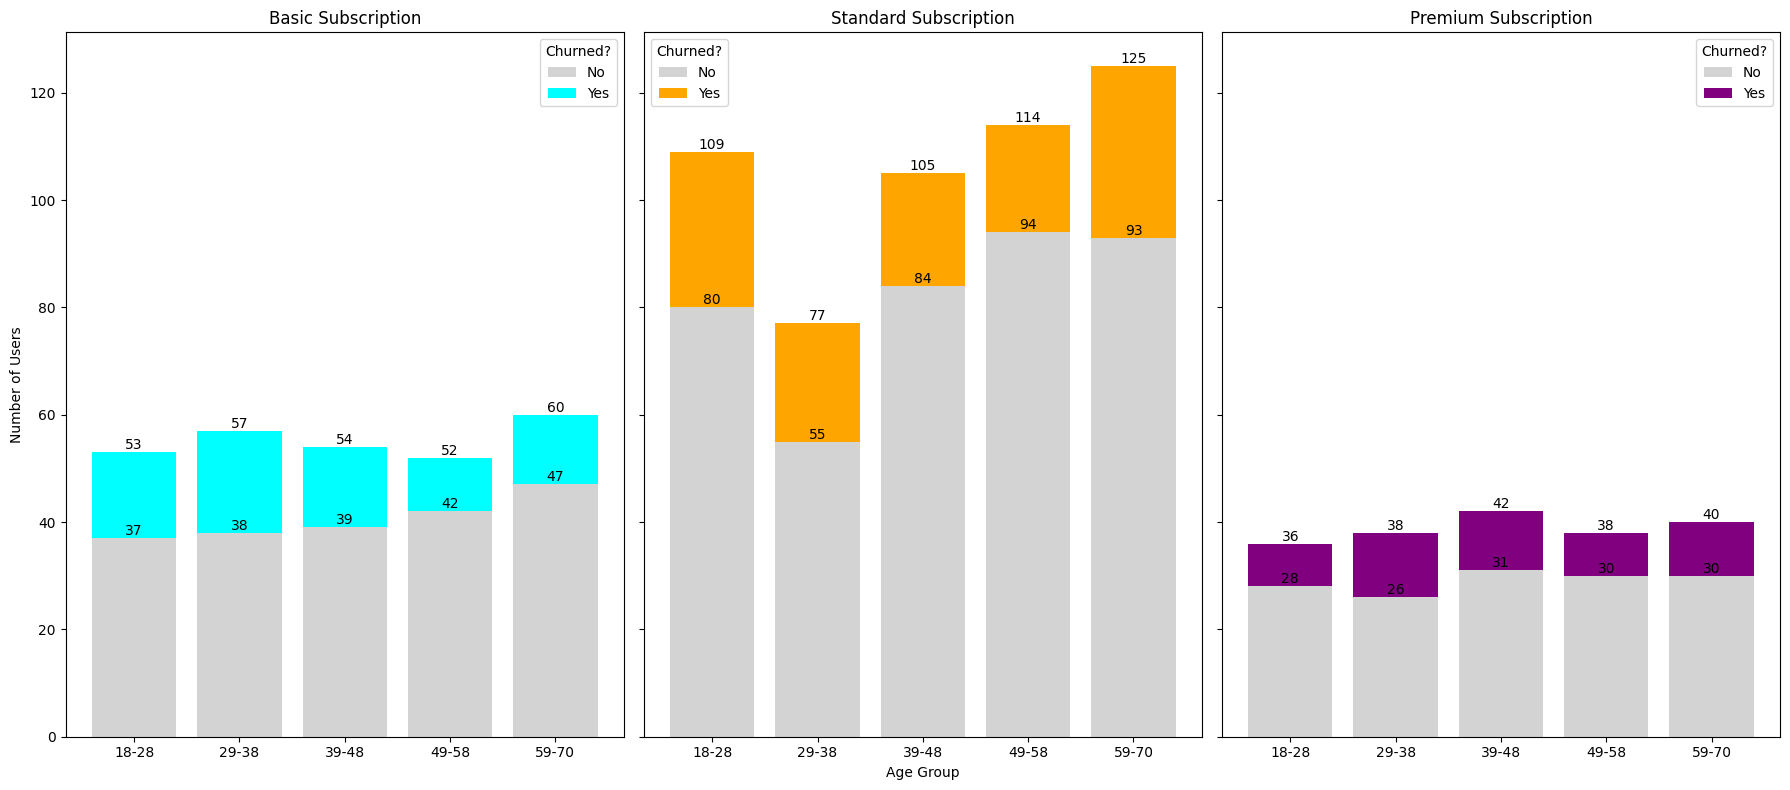

In [70]:
# Define age bins and labels
bins = [18, 29, 39, 49, 59, 71]
labels = ['18-28', '29-38', '39-48', '49-58', '59-70']

# Add an 'Age_Group' column to the dataset
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Add the 'Churn Flag' column to the dataset
df['Churn_Flag'] = np.where(df['Reason_for_Churn'].isnull(), 'No', 'Yes')

# Filter data for each subscription type
basic_data = df[df['Subscription_Type'] == 'Basic']
standard_data = df[df['Subscription_Type'] == 'Standard']
premium_data = df[df['Subscription_Type'] == 'Premium']

# Group by Age_Group and Churn_Flag and count the number of users for each subscription type
basic_churn = basic_data.groupby(['Age_Group', 'Churn_Flag']).size().unstack(fill_value=0)
standard_churn = standard_data.groupby(['Age_Group', 'Churn_Flag']).size().unstack(fill_value=0)
premium_churn = premium_data.groupby(['Age_Group', 'Churn_Flag']).size().unstack(fill_value=0)

# Plot the data with stacked columns for each subscription type
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

basic_churn.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, color=['lightgray', 'cyan'])
axes[0].set_title('Basic Subscription')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Users')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Churned?')

standard_churn.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, color=['lightgray', 'orange'])
axes[1].set_title('Standard Subscription')
axes[1].set_xlabel('Age Group')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Churned?')

premium_churn.plot(kind='bar', stacked=True, ax=axes[2], width=0.8, color=['lightgray', 'purple'])
axes[2].set_title('Premium Subscription')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Churned?')

# Adding data labels for each plot
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

# Display the plots
plt.tight_layout()
plt.show()